# Paket Prabayar Manakah yang Lebih Baik?
## Pendahuluan <a id='intro'></a>

Sebagai seorang analis di perusahaan telekomunikasi Megaline, proyek ini bertujuan untuk menentukan paket prabayar yang menghasilkan pendapatan lebih tinggi berdasarkan analisis data dari 500 pelanggan. Data tersebut mencakup informasi pelanggan, asal, jenis paket, serta aktivitas panggilan dan pesan pada tahun 2018. Tujuan utama proyek ini adalah membantu perusahaan mengoptimalkan pendapatan dan anggaran iklan mereka dengan memahami perilaku pelanggan..

### Tujuan: 
Dengan mencapai tujuan-tujuan ini, proyek ini diharapkan dapat membantu Megaline dalam meningkatkan pendapatan mereka dan mengambil keputusan yang lebih baik dalam pengelolaan paket prabayar mereka.

- Menganalisis perilaku pelanggan Megaline berdasarkan data yang ada, termasuk jenis paket yang mereka gunakan, jumlah panggilan, pesan, dan penggunaan data selama tahun 2018.

- Mengidentifikasi paket prabayar yang menghasilkan pendapatan lebih tinggi untuk perusahaan Megaline.

- Memberikan rekomendasi kepada departemen periklanan Megaline untuk mengalokasikan anggaran iklan dengan lebih efektif berdasarkan temuan analisis.

- Mengoptimalkan strategi pemasaran dan penawaran paket prabayar kepada pelanggan berdasarkan pemahaman lebih baik tentang preferensi dan perilaku pelanggan.

### Tahapan yang Dilakukan
Di sini kita akan melakukan analisa dataset pada 5 dataset yaitu:

`"/datasets/megaline_calls.csv"`

`"/datasets/megaline_internet.csv"`

`"/datasets/megaline_messages.csv"`

`"/datasets/megaline_plans.csv"`

`"/datasets/megaline_users.csv"`


Proyek ini terdiri dari 6 tahap: 
 1. Inisialisasi
 2. Memuat Data
 3. Mempersiapkan Data dan Memperbaiki Kualitas Data
 4. Mempelajari Syarat dan Kondisi Terkait Paket Prabayar
 5. Mengagregasi Data per Pengguna
 6. Mempelajari Perilaku Pengguna


-----------

## Inisialisasi

- Mari kita muat library yang kita butuhkan.

In [1]:
# Muat semua library
from scipy import stats as st
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

## Memuat Data

- Berdasarkan permintaan, berikut dataset yang akan kita analisa:

In [2]:
# Muat file data ke dalam DataFrame yang berbeda
mega_calls = pd.read_csv("/datasets/megaline_calls.csv") 
mega_internet = pd.read_csv("/datasets/megaline_internet.csv") 
mega_messages = pd.read_csv("/datasets/megaline_messages.csv") 
mega_plans = pd.read_csv("/datasets/megaline_plans.csv") 
mega_users = pd.read_csv("/datasets/megaline_users.csv")


## Mempersiapkan Data

- Pertama kita akan tinjau dengan menggunakan .info untuk melihat apakah ada kesalahan dalam tipe data dari masing-masing dataset. Data untuk proyek ini dibagi menjadi beberapa tabel. Kita akan jelajahi masing-masing tabel untuk mendapatkan pemahaman awal untuk data tersebut. Mari kita lakukan koreksi di setiap tabel jika memang diperlukan.

## Paket Prabayar

In [3]:
# Tampilkan informasi/rangkuman umum tentang DataFrame paket-paket prabayar
mega_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


- <font color='green'>Temuan</font>

Untuk tipe data, tidak ada yang harus diubah. 

-----------------------

In [4]:
# Tampilkan sampel data untuk paket prabayar
mega_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


- Ditinjauh dari kolom yang bertipe data float cukup logis untuk kuatlitas data yang dimiliki. 1 menit adalah 0.03 dollar untuk paket usd_per_message dan usd_per_minute surf sedangkan 0.01 dollar untuk paket ultimate. Jika kita tinjau data ini memang logis dan bawaan tipe data tersebut sudah tepat.

- <font color='green'>Kesimpulan Sementara</font>

Untuk tipe data tidak ada yang harus diubah. Dengan kolom usd_per_message dan usd_per_minute yang memiliki tipe data float, hal ini cukup logis untuk menghitung satuan paket yang akan dihitung. Jika ini diubah dengan integer maka dipastikan harga akan terbilang sangat mahal untuk 1 message saja. Namun kita belum mengetahui apakah dengan integer atau float perhitungan akan lebih efektif untuk itu.

------------

### Memperbaiki Data

- Untuk dataset mega_plans terlihat tidak memerlukan faktor yang mendukung atau sebagainya. Karena cukup terwakili dengan kolom-kolom yang sudah ada

In [5]:
# tidak ada data yang harus diperbaiki
mega_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes



### Memperkaya Kualitas Data

In [6]:
# tidak ada data yang harus ditambah
mega_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


- <font color='green'>Kesimpulan Sementara</font>

Untuk saat ini kita belum memerlukan faktor pendukung pada dataset untuk kolom-kolom.

## Pengguna

- Mari kita periksa dan perbaiki tipe data yang tidak sesuai

In [7]:
# Tampilkan informasi/rangkuman umum tentang DataFrame Pengguna
mega_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


- <font color='green'>Temuan</font>

Terdapat data yang hilang untuk dataset mega_users pada kolom churn_date. Entry maksimal yaitu 500 sedangkan di dalam kolom tersebut hanya memiliki 34 yang terisi.

In [8]:
# Tampilkan sampel data pengguna
mega_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


- <font color='green'>Kesimpulan Sementara</font>

churn_date merupakan kolom yang banyak nilai hilangnya serta memiliki tipe data yang tidak sesuai. Kita akan ubah tipe data tersebut menjadi date_time dan mengisi nilai kosong tersebut. Namun ini cukup rumit, karena nilai hilang yang kita miliki di dalam kolom tersebut adalah bentuk berupa tanggal. Kita tidak bisa menentukan hal tersebut dengan nilai seperti mean atau median. Namun kita masih belum mengetahui apa pengaruh churn_date untuk analisa berkelanjutan. Untuk siaga mari kita ubah saja tipe data yang ditinjau kurang sesuai.

 


### Memperbaiki Data

- Mari kita perbaiki tipe data yang tidak sesuai.

In [9]:
mega_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
mega_users['churn_date'] = pd.to_datetime(mega_users['churn_date'])

In [11]:
mega_users['reg_date'] = pd.to_datetime(mega_users['reg_date'])

- <font color='green'>Kesimpulan Sementara</font>

Untuk saat ini kita perbaiki tipe data terlebih dahulu pada kolom churn_date dan reg_date. Kita akan memperkaya kualitas data dengan cara mengisi nilai kosong yang ada di langkah selanjutnya. 

### Memperkaya Kualitas Data

- Untuk lebih mendukung analisis kita, mari kita teliti terlebih dahulu nilai yang tidak hilang. 

In [12]:
mega_users[mega_users['churn_date'].notna()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11
94,1094,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12


In [13]:
# Membuat daftar tanggal acak
start_date = datetime(2018, 1, 1)  # Tanggal awal
end_date = datetime(2018, 12, 31)  # Tanggal akhir
date_range = [start_date + timedelta(days= random.randint(0, (end_date - start_date).days)) for _ in range(len(mega_users))]

# Menggantikan nilai yang hilang dalam kolom churn_date dengan tanggal-tanggal acak
mega_users['churn_date'].fillna(pd.Series(date_range), inplace=True)


- Berdasarkan data eksisting, rentang waktu yang ada di nilai yang tidak kosong yaitu di tahun 2018. Merujuk kepada code di atas, kita akan set waktunya di rentang waktu 2018 dengan secara acak dari bulan 1 ke bulan 12.

In [14]:
mega_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-11-24
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-05-27
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-09-28
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-02-13
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-04-13
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,2018-06-30
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,2018-10-02
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-12-06
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,2018-05-17


In [15]:
mega_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


- <font color='green'>Kesimpulan Sementara</font>

Untuk sementara kita sudah mengubah tipe data dan mengisi nilai-nilai kosong pada kolom churn_date dan mengubah tipe data pada kolom reg_date.

## Panggilan

- Mari kita periksa rangkuman data pada dataset mega_calls dan hal yang mendukung untuk hasil analisa.

In [16]:
# Tampilkan informasi/rangkuman umum tentang DataFrame panggilan
mega_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


- <font color='green'>Temuan</font>

Kita akan ubah tipe data call_date menjadi datetime.

In [17]:
# Tampilkan sampel data berisi panggilan
mega_calls.head(20)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [18]:
# Tampilkan sampel data berisi panggilan
mega_calls.tail(20)


,id,user_id,call_date,duration
137715,1499_184,1499,2018-09-15,0.00
137716,1499_185,1499,2018-12-05,9.78
137717,1499_186,1499,2018-10-08,16.73
137718,1499_187,1499,2018-12-20,10.08
137719,1499_188,1499,2018-09-29,23.42
137720,1499_189,1499,2018-12-27,0.00
137721,1499_190,1499,2018-09-03,7.82
137722,1499_191,1499,2018-12-24,0.00
137723,1499_192,1499,2018-11-27,8.27
137724,1499_193,1499,2018-10-22,7.22


- <font color='green'>Kesimpulan Sementara</font>


- Jika kita lihat, pada kolom user_id data terlihat seperti "duplikat". Namun ini bisa saja user_id yang kita lihat merupakan suatu hal yang dimana ketika kita membuat suatu akun maka akan dikategorikan atau di plot kan kepada ID tertentu. Hal ini mungkin berdasarkan jam dibuat atau faktor lainnya. Bisa kita lihat user_id dengan nomor 1000 bisa dengan jumlah yang cukup banyak bisa saja dibuat dengan hari yang sama dengan orang-orang yang memiliki user_id yang sama. Hal ini jelas bukan duplikat. Kita bisa lihat preview pada .tail().

### Memperbaiki Data

- Mari kita perbaiki data yang ada pada dataset tersebut.


In [19]:
mega_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [20]:
mega_calls['call_date'] = pd.to_datetime(mega_calls['call_date'])

In [21]:
mega_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [22]:
mega_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


- <font color='green'>Kesimpulan Sementara</font>

Kita tidak akan meruba tipe data duration. Biarkan duration tersebut disetarakan dengan cara bagaimana jam stopwatch bekerja.

### Memperkaya Kualitas Data

- Untuk kolom duration, kita akan kategorikan masing-masing dengan label panjang atau pendeknya durasi panggilan. Hal ini untuk memudahkan kita untuk melihat nilai kosong untuk 1 tabel yang memiliki kolom yang cukup banyak.


In [23]:
max_duration = mega_calls['duration'].max()
min_duration = mega_calls['duration'].min()

print(f"Nilai maksimum dari kolom 'duration': {max_duration}")
print(f"Nilai minimum dari kolom 'duration': {min_duration}")

Nilai maksimum dari kolom 'duration': 37.6
Nilai minimum dari kolom 'duration': 0.0


In [24]:
# Menentukan batas bins secara manual
bins = [0.1, 5, 10, 20, mega_calls['duration'].max()] 

# Menentukan label kategori
labels = ['very short','short', 'high', 'very high']

# Menambahkan kolom 'usage_category' berdasarkan rentang angka
mega_calls['duration_category'] = pd.cut(mega_calls['duration'], bins=bins, labels=labels, right=False)

mega_calls.head(50)

,id,user_id,call_date,duration,duration_category
0,1000_93,1000,2018-12-27,8.52,short
1,1000_145,1000,2018-12-27,13.66,high
2,1000_247,1000,2018-12-27,14.48,high
3,1000_309,1000,2018-12-28,5.76,short
4,1000_380,1000,2018-12-30,4.22,very short
5,1000_388,1000,2018-12-31,2.20,very short
6,1000_510,1000,2018-12-27,5.75,short
7,1000_521,1000,2018-12-28,14.18,high
8,1000_530,1000,2018-12-28,5.77,short
9,1000_544,1000,2018-12-26,4.40,very short


- <font color='green'>Kesimpulan Sementara</font>


Kita biarkan kolom yang berisi NaN pada duration category. Karena kita sudah menetapkan bins dari angka 0.1, sehingga durasi dibawah angka 0.1 dianggap NaN. Angka NaN juga menunjukan bahwa user memang tidak ada aktifitas untuk menggunakan layanan salah satu dari paket data. 

## Pesan/SMS

- Mari kita tinjau dan analisa pada dataset pesan/sms

In [25]:
# Tampilkan informasi/rangkuman umum tentang DataFrame SMS
mega_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


- <font color='green'>Temuan</font>

Di sini kita akan mengubah tipe data message_date menjadi datetime. Dari temuan yang kita punya, jumlah kolom sangat sedikit. Besar kemungkinan kita hanya memanipulasi terhadap 1 kolom saja.

In [26]:
# Tampilkan sampel data untuk SMS
mega_messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


- <font color='green'>Kesimpulan Sementara</font>

Baik, terlihat normal dari segi apapun. Seperti yang sudah dijelaskan, nilai user_id bisa memungkinkan dimana setiap individu membuat akun di hari yang sama atau faktor lainnya, sehingga nilai terlihat "duplikat"

### Memperbaiki Data

- Mari kita ubah kolom message_date dengan tipe data yang sesuai.


In [27]:
mega_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [28]:
mega_messages['message_date'] = pd.to_datetime(mega_messages['message_date'])

In [29]:
mega_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [30]:
mega_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


- <font color='green'>Kesimpulan Sementara</font>

Kita coba hanya satu kolom saja yang perlu kita perbaiki. Dari data tersebut kita tidak akan menambah atau mengurangi apapun dari dataset tersebut. 

### Memperkaya Kualitas Data

- Dari dataset tersebut, kita tidak perlu menambahkan apapun karena tidak ada yang perlu kita tambah atau kurangi.



In [31]:
# tidak ada yang harus ditambah
mega_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


- <font color='green'>Kesimpulan Sementara</font>

Data terlihat tidak ada yang harus diubah atau ditambah. Data cukup mewakili untuk perhitungan kedepannya.

## Internet

- Mari kita tinjau dataset mega_internet

In [32]:
# Tampilkan informasi/rangkuman umum tentang DataFrame internet
mega_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [33]:
# Tampilkan sampel data untuk traffic internet
mega_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


- <font color='green'>Kesimpulan Sementara</font>

Dari dataset tersebut, kita akan ubah kolom session_date menjadi datetime. Untuk mb_used sudah merupakan hal yang tepat dalam perhitungan paket data. Hal ini dikarenakan akumulasi dari lama waktu yang digunakan memungkinkan untuk selaras dengan paket prabayar yang ditentukan oleh pelanggan. Sehingga pilihan tipe data float untuk kolom mb_used merupakan hal yang sudah sesuai.

### Memperbaiki Data

- Mari kita perbaiki kolom mb_used


In [34]:
mega_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [35]:
mega_internet['session_date'] = pd.to_datetime(mega_internet['session_date'])

In [36]:
mega_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [37]:
mega_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


- <font color='green'>Kesimpulan Sementara</font>

Kita di sini mungkin akan mengkategorikan mb_used ke dalam kualitas data. Hal ini agar bisa menjadi pembeda dalam seberapa besar yang dihasilkan oleh 1 pelanggan untuk 1 paket prabayar tersebut, dan juga bisa menjadi sebuah indikator untuk dataset ini.

### Memperkaya Kualitas Data

- Mari kita tinjau dengan cara serupa dengan dataset yang kita tambahkan faktor seperti dataset pengguna yaitu mega_users

In [38]:
max_internet = mega_internet['mb_used'].max()
min_internet = mega_internet['mb_used'].min()

print(f"Nilai maksimum dari kolom 'mb_used': {max_internet}")
print(f"Nilai minimum dari kolom 'mb_used': {min_internet}")

Nilai maksimum dari kolom 'mb_used': 1693.47
Nilai minimum dari kolom 'mb_used': 0.0


- Di sini kita akan tentukan dulu rentang nilai maksimum dan minimum agar mudah untuk dikategorikan.

In [39]:
# Menentukan batas bins secara manual
bins = [0.1, 100, 500, 1000, mega_internet['mb_used'].max()] 

# Menentukan label kategori
labels = ['very low', 'low', 'average', 'high']

# Menambahkan kolom 'usage_category' berdasarkan rentang angka
mega_internet['usage_category'] = pd.cut(mega_internet['mb_used'], bins=bins, labels=labels, right=False)


In [40]:
mega_internet.head(50)

,id,user_id,session_date,mb_used,usage_category
0,1000_13,1000,2018-12-29,89.86,very low
1,1000_204,1000,2018-12-31,0.00,NaN
2,1000_379,1000,2018-12-28,660.40,average
3,1000_413,1000,2018-12-26,270.99,low
4,1000_442,1000,2018-12-27,880.22,average
5,1001_0,1001,2018-08-24,284.68,low
6,1001_3,1001,2018-12-09,656.04,average
7,1001_4,1001,2018-11-04,16.97,very low
8,1001_10,1001,2018-11-27,135.18,low
9,1001_15,1001,2018-12-13,761.92,average


- <font color='green'>Temuan</font>

Sama halnya kita biarkan nilai NaN karena bins yang kita tetapkan yaitu di bawah angka 0.1, agar tidak menggangu kategori yang lainnya.

## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

Kita harus memahami cara kerja paket. Sangat penting untuk memahami cara kerja paket, bagaimana pengguna dikenakan biaya berdasarkan paket prabayar yang mereka pilih. Oleh karena itu, kita akan menampilkan informasi paket guna memeriksa persyaratannya sekali lagi.

In [41]:
# Tampilkan persyaratan paket prabayar dan pastikan Anda memahaminya
mega_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [42]:
mega_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


- <font color='green'>Catatan & Kesimpulan Sementara</font>

**plan_name             : nama paket telepon**

**usd_monthly_fee       : biaya bulanan dalam dolar AS**

**minutes_included      : alokasi menit panggilan bulanan**

**messages_included     : alokasi SMS bulanan**

**mb_per_month_included : alokasi volume data bulanan (dalam megabyte)**

**usd_per_minute        : harga per menit jika sudah melebihi batas alokasi paket (misalnya, jika paket memiliki alokasi 100 menit maka penggunaan mulai dari menit ke-101 akan dikenakan biaya)**

**usd_per_message       : harga per SMS jika sudah melebihi batas alokasi paket**

**usd_per_gb            : harga per gigabyte tambahan data jika sudah melebihi batas alokasi paket (1 GB = 1024 megabyte)**



## Mengagregasi Data per Pengguna

- Di sini kita akan menghitung pendapatan per bulan dari setiap pengguna dan setiap paket yang dipilih. Syarat perhitungan sudah kita catat di sebelum bab ini.

- Kita sudah membersihkan data yang akan kita analisa. Sekarang, karena data yang kita miliki telah bersih, mari kita agregasikan data setiap pengguna per periode agar kita hanya memiliki satu catatan per pengguna per periode. Hal ini akan memudahkan analisis lebih lanjut.

- Sebelum kita melakukan analisa, mari kita tambahkan kolom "month" untuk setiap dataset. Hal ini untuk memudahkan kita melakukan perhitungan bulanan.



In [43]:
def to_month(dataset, col_name):
    temp = pd.to_datetime(dataset[col_name])
    temp = temp.dt.to_period("M")
    return temp

In [44]:
# membuat kolom year-month di dataset calls
mega_calls['month'] = to_month(mega_calls, 'call_date')
mega_calls.head()

,id,user_id,call_date,duration,duration_category,month
0,1000_93,1000,2018-12-27,8.52,short,2018-12
1,1000_145,1000,2018-12-27,13.66,high,2018-12
2,1000_247,1000,2018-12-27,14.48,high,2018-12
3,1000_309,1000,2018-12-28,5.76,short,2018-12
4,1000_380,1000,2018-12-30,4.22,very short,2018-12


In [45]:
# membuat kolom year-month di dataset internet
mega_internet['month'] = to_month(mega_internet, 'session_date')
mega_internet.head()

,id,user_id,session_date,mb_used,usage_category,month
0,1000_13,1000,2018-12-29,89.86,very low,2018-12
1,1000_204,1000,2018-12-31,0.00,NaN,2018-12
2,1000_379,1000,2018-12-28,660.40,average,2018-12
3,1000_413,1000,2018-12-26,270.99,low,2018-12
4,1000_442,1000,2018-12-27,880.22,average,2018-12


In [46]:
# membuat kolom year-month di dataset messages
mega_messages['month'] = to_month(mega_messages, 'message_date')
mega_messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


In [47]:
# mengubah duration menjadi tipe data int
mega_calls['duration'] = np.ceil(mega_calls['duration']).astype('int16')
mega_calls.head()


,id,user_id,call_date,duration,duration_category,month
0,1000_93,1000,2018-12-27,9,short,2018-12
1,1000_145,1000,2018-12-27,14,high,2018-12
2,1000_247,1000,2018-12-27,15,high,2018-12
3,1000_309,1000,2018-12-28,6,short,2018-12
4,1000_380,1000,2018-12-30,5,very short,2018-12


- Mari kita hitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan. Lalu simpan hasilnya

In [48]:
# hitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan.
mega_calls_agg = pd.pivot_table(mega_calls, index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()
mega_calls_agg.head()

,user_id,month,duration
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426


In [49]:
# hitung jumlah paket data yang dikirim oleh setiap pengguna per bulan. 
mega_internet_agg = pd.pivot_table(mega_internet, index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
mega_internet_agg.head()

,user_id,month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


- Pada data sebelumnya, kolom mb_used sudah tepat, namun kita harus mengkonversikan mb_used ke gb_used agar mudah untuk dibulatkan. Selain itu, GB adalah traffic data yang mudah untuk dibaca.

In [50]:
# convert to GB dan dibulatkan ke atas
mega_internet_agg['gb_used'] = np.ceil(mega_internet_agg['mb_used'] / 1024)
mega_internet_agg.head()

,user_id,month,mb_used,gb_used
0,1000,2018-12,1901.47,2.0
1,1001,2018-08,6919.15,7.0
2,1001,2018-09,13314.82,14.0
3,1001,2018-10,22330.49,22.0
4,1001,2018-11,18504.30,19.0


In [51]:
# hitung jumlah SMS yang dikirim oleh setiap pengguna per bulan.
mega_messages_agg = pd.pivot_table(mega_messages, index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
mega_messages_agg.columns = ['user_id', 'month', 'sms']
mega_messages_agg.head()

,user_id,month,sms
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


- Mari kita gabungkan dataset yang telah kita agregasi untuk menjadi 1 dataset yang baru.

In [52]:
# Gabungkan data panggilan, menit, SMS, dan internet berdasarkan user_id dan month (bulan)
calls_internet_merge = mega_calls_agg.merge(mega_internet_agg, how='outer', on=['user_id', 'month'])
calls_internet_merge = calls_internet_merge.merge(mega_messages_agg, how='outer', on=['user_id', 'month'])


- <font color='green'>Kesimpulan Sementara</font>

Dataset yang kita buat telah digabungkan hal ini dijadikan sebagai suatu satu catatan di dalamnya akan menunjukkan tingkat konsumsi seorang pengguna unik dalam satu bulan tertentu.

-------------

### Tambahkan informasi paket prabayarnya

- Tujuan dari sub bab ini yaitu untuk menggabungkan dataset yang telah kita agregasikan dan menggabungkannya ke dalam dataset plans. Sebelum kita lakukan, kita akan memperkaya dataset atau menggabungkannya dengan dataset users. Sehingga penggabungan ini melibatkan gabungan antara users dan plan ditambah gabungan antara agregasi calls, messages, dan internet.

In [53]:
# menambahkan informasi paket prabayarnya
mega_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [54]:
# mengkonversikan mb per month menjadi gb per month
mega_plans['gb_per_month_included'] = mega_plans['mb_per_month_included'] / 1024

# menghapus kolom yang tidak dibutuhkan
mega_plans.drop('mb_per_month_included', axis=1, inplace=True)
mega_plans

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


- Kita hapus beberapa kolom yang tidak perlu, setelah itu kita gabungkan dengan data plans dengan users.

In [55]:
# menggabungkan dataset users dengan plans
mega_users_plans = mega_users.merge(mega_plans, how='left', left_on='plan', right_on='plan_name').drop('plan_name', axis=1)
mega_users_plans.tail()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-08-03,50,500,20,10,0.03,0.03,15.0
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-06-09,50,500,20,10,0.03,0.03,15.0
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-08-21,1000,3000,70,7,0.01,0.01,30.0
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-03-10,50,500,20,10,0.03,0.03,15.0
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-03-29,50,500,20,10,0.03,0.03,15.0


- <font color='green'>Kesimpulan Sementara</font>

Mari kita hitung pendapatan bulanan dari setiap pengguna (caranya, kurangi batas paket gratis dari jumlah total panggilan, pesan teks, dan data; kalikan hasilnya dengan nilai paket panggilan; lalu tambahkan biaya bulanan berdasarkan pada jenis paket panggilan). N.B. Kode untuk bagian ini mungkin tidak sesederhana yang kita kira, mengingat persyaratan paketnya cukup rumit! Karena itu, tidak masalah jika Anda membutuhkan lebih banyak waktu untuk mengerjakannya.

----------

### Menghitung 5 Dataset yang Telah digabungkan

- Mari kita hitung seluruh dataset yang telah digabungkan berdasarkan deskripsi kesimpulan sementara sebelum sub bab ini.

In [56]:
# menghitung pendapatan bulanan untuk setiap pengguna
three_agg_dataset = calls_internet_merge.merge(mega_users_plans, how='left', on='user_id')

# mengisi nilai hilang di kolom numerikal dengan 0
three_agg_dataset[['duration', 'gb_used', 'sms']] = three_agg_dataset[['duration', 'gb_used', 'sms']].fillna(0)
three_agg_dataset.tail()

,user_id,month,duration,mb_used,gb_used,sms,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
2288,1349,2018-10,0.0,13093.55,13.0,76.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,2018-12-11,50,500,20,10,0.03,0.03,15.0
2289,1349,2018-11,0.0,17128.26,17.0,72.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,2018-12-11,50,500,20,10,0.03,0.03,15.0
2290,1349,2018-12,0.0,13039.91,13.0,61.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,2018-12-11,50,500,20,10,0.03,0.03,15.0
2291,1361,2018-05,0.0,1519.69,2.0,2.0,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",2018-04-14,surf,2018-09-02,50,500,20,10,0.03,0.03,15.0
2292,1482,2018-10,0.0,NaN,0.0,2.0,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,2018-07-30,1000,3000,70,7,0.01,0.01,30.0


In [57]:
# menghapus kolom yang tidak dibutuhkan
three_agg_dataset.drop(['mb_used', 'reg_date', 'churn_date'], axis=1, inplace=True)
three_agg_dataset.head()

,user_id,month,duration,gb_used,sms,first_name,last_name,age,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,2018-12,124.0,2.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,30.0
1,1001,2018-08,182.0,7.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,15.0
2,1001,2018-09,315.0,14.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,15.0
3,1001,2018-10,393.0,22.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,15.0
4,1001,2018-11,426.0,19.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,15.0


- Berhubung perhitungan mb tidak akan gunakan, maka kita hapus kolom tersebut. Setelah itu hapus yang tidak ada kaitannya dengan perhitungan ini.

#### Menghitung Selisih Penggunaan dengan Batas Paket

In [58]:
# hitung selisih penggunaan dengan batas paket

# membuat kolom menghitung biaya ekstra di telepon
three_agg_dataset['extra_calls'] = (three_agg_dataset['duration'] - three_agg_dataset['minutes_included']) * three_agg_dataset['usd_per_minute']

# harga minus artinya adalah tidak berlebihan dan harus diganti 0
three_agg_dataset.loc[three_agg_dataset['extra_calls'] < 0, 'extra_calls'] = 0


#### Menghitung Biaya Ekstra di Internet

In [59]:
# dengan kolom tambahan extra_internet, hitung biaya ekstra di internet
three_agg_dataset['extra_internet'] = (three_agg_dataset['gb_used'] - three_agg_dataset['gb_per_month_included']) * three_agg_dataset['usd_per_gb']

# harga minus artinya adalah tidak berlebihan dan harus diganti 0
three_agg_dataset.loc[three_agg_dataset['extra_internet'] < 0, 'extra_internet'] = 0

#### Menghitung Biaya Ekstra di Message

In [60]:
# dengan kolom tambahan extra_sms, hitung biaya ekstra di message
three_agg_dataset['extra_sms'] = (three_agg_dataset['sms'] - three_agg_dataset['messages_included']) * three_agg_dataset['usd_per_message']

# harga minus artinya adalah tidak berlebihan dan harus diganti 0
three_agg_dataset.loc[three_agg_dataset['extra_sms'] < 0, 'extra_sms'] = 0

#### Menghitung Pendapatan Perbulan (Total Income)

In [61]:
# menambahkan kolom total income untuk menghitung pendapatan per bulan
three_agg_dataset['total_income'] = three_agg_dataset['usd_monthly_pay'] + three_agg_dataset['extra_calls'] + three_agg_dataset['extra_internet'] + three_agg_dataset['extra_sms']
three_agg_dataset.tail()

,user_id,month,duration,gb_used,sms,first_name,last_name,age,city,plan,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_calls,extra_internet,extra_sms,total_income
2288,1349,2018-10,0.0,13.0,76.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",surf,...,500,20,10,0.03,0.03,15.0,0.0,0.0,0.78,20.78
2289,1349,2018-11,0.0,17.0,72.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",surf,...,500,20,10,0.03,0.03,15.0,0.0,20.0,0.66,40.66
2290,1349,2018-12,0.0,13.0,61.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",surf,...,500,20,10,0.03,0.03,15.0,0.0,0.0,0.33,20.33
2291,1361,2018-05,0.0,2.0,2.0,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",surf,...,500,20,10,0.03,0.03,15.0,0.0,0.0,0.00,20.00
2292,1482,2018-10,0.0,0.0,2.0,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,...,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.00,70.00


-------

In [62]:
three_agg_dataset.head()

,user_id,month,duration,gb_used,sms,first_name,last_name,age,city,plan,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_calls,extra_internet,extra_sms,total_income
0,1000,2018-12,124.0,2.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,...,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.00,70.00
1,1001,2018-08,182.0,7.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,...,500,20,10,0.03,0.03,15.0,0.0,0.0,0.00,20.00
2,1001,2018-09,315.0,14.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,...,500,20,10,0.03,0.03,15.0,0.0,0.0,0.00,20.00
3,1001,2018-10,393.0,22.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,...,500,20,10,0.03,0.03,15.0,0.0,70.0,0.09,90.09
4,1001,2018-11,426.0,19.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,...,500,20,10,0.03,0.03,15.0,0.0,40.0,0.00,60.00


- <font color='green'>Kesimpulan Sementara</font>

Data telah dihitung berdasarkan ketentuan yang ditentukan. Hasil yang telah disimpan berada di kolom total_income

-----------

## Mempelajari Perilaku Pengguna

- Di sini kita akan menghitung beberapa perhitungan statistika deskriptif yang berguna untuk data yang telah diagregasi dan digabungkan. Hal ini biasanya mampu mengungkapkan gambaran keseluruhan yang ditangkap oleh data tersebut. Kita akan membuat beberapa grafik yang berguna untuk membantu pemahaman dataset. 

- Kita juga akan melakukan seluruh perhitungan untuk setiap panggilan, pesan/sms, internet, dan pendapatan.

- Mengingat bahwa tugas utamanya adalah membandingkan paket-paket prabayar dan memutuskan paket prabayar manakah yang lebih menguntungkan (pendapatan), maka perhitungan statistika dan grafik harus dilakukan berdasarkan tiap paket.



### Panggilan

- Kita di sini akan mempelajari dengan memvisualisasikan data dari panggilan. 

In [63]:
# Bandingkan durasi rata-rata panggilan setiap paket per bulannya. Buatlah sebuah diagram batang untuk memvisualisasikannya.
calls_avg_duration = pd.pivot_table(three_agg_dataset, index='month', columns='plan', values='duration', aggfunc='mean').reset_index()
calls_avg_duration['month'] = calls_avg_duration['month'].astype(str)
calls_avg_duration

plan,month,surf,ultimate
0,2018-01,203.000000,193.500000
1,2018-02,297.000000,403.142857
2,2018-03,330.000000,304.250000
3,2018-04,351.540000,336.857143
4,2018-05,399.584416,406.241379
5,2018-06,431.298969,370.957447
6,2018-07,449.983471,427.067797
7,2018-08,410.111111,421.436620
8,2018-09,414.226804,437.511628
9,2018-10,429.729958,450.735849


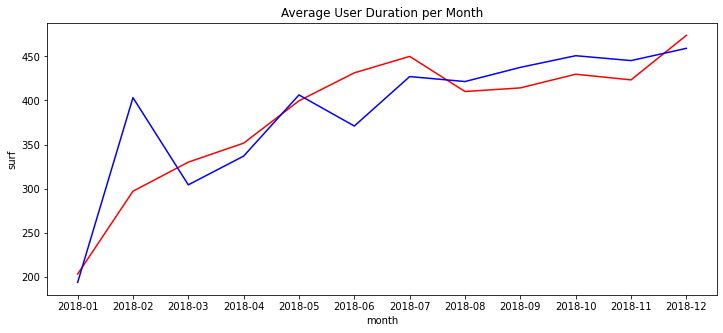

In [64]:
plt.figure(figsize=(12, 5))
plt.title('Average User Duration per Month')
sns.lineplot(data=calls_avg_duration, x="month", y="surf", color='red')
sns.lineplot(data=calls_avg_duration, x="month", y="ultimate", color='blue')
plt.show()

- <font color='green'>Kesimpulan Sementara</font>

Data ini merupakan rata-rata durasi panggilan untuk setiap paket yang dipilih oleh pengguna.

1. Kita bisa melihat keselarasan dari ke dua paket tersebut. Rata-rata pengguna surf sedikit menyaingi pengguna ultimate.
2. Besar kemungkinan pengguna surf lebih banyak dari ultimate.


In [65]:
# Bandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. Buatlah sebuah histogram.
calls_duration_monthly = pd.pivot_table(three_agg_dataset, index='month', columns='plan', values='duration', aggfunc='sum').reset_index()
calls_duration_monthly['month'] = calls_duration_monthly['month'].astype(str)
calls_duration_monthly


plan,month,surf,ultimate
0,2018-01,406.0,774.0
1,2018-02,2673.0,2822.0
2,2018-03,7590.0,3651.0
3,2018-04,17577.0,7074.0
4,2018-05,30768.0,11781.0
5,2018-06,41836.0,17435.0
6,2018-07,54448.0,25197.0
7,2018-08,66438.0,29922.0
8,2018-09,80360.0,37626.0
9,2018-10,101846.0,47778.0


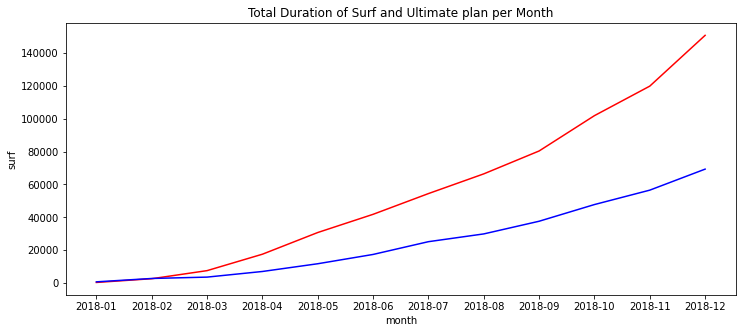

In [66]:
plt.figure(figsize=(12, 5))
plt.title('Total Duration of Surf and Ultimate plan per Month')
sns.lineplot(data=calls_duration_monthly, x="month", y="surf", color='red')
sns.lineplot(data=calls_duration_monthly, x="month", y="ultimate", color='blue')
plt.show()

- <font color='green'>Kesimpulan Sementara</font>

Bisa dipastikan bahwa jumlah yang kita miliki untu surf memang memiliki banyak pengguna.

#### Varians & Boxplot Panggilan

In [67]:
# mempersiapkan perhitungan data varians
# hitung rata-rata dan varians dari durasi panggilan bulanan
avg_user_calls = pd.pivot_table(three_agg_dataset, index='user_id', columns='plan', values='duration', aggfunc='mean').reset_index()


In [68]:
# dapatkan user surf
avg_surf_calls = avg_user_calls.loc[:, ['user_id', 'surf']].dropna()
avg_surf_calls.head()

plan,user_id,surf
1,1001,345.600000
2,1002,276.333333
3,1003,1104.000000
4,1004,346.500000
5,1005,496.000000


In [69]:
# dapatkan user ultimate
avg_ulti_calls = avg_user_calls.loc[:, ['user_id', 'ultimate']].dropna()
avg_ulti_calls.head()

plan,user_id,ultimate
0,1000,124.000000
6,1006,34.500000
8,1008,518.666667
11,1011,415.285714
13,1013,219.000000


In [70]:
# varians dan standar deviasi
# surf
surf_std_calls = round(avg_surf_calls['surf'].std(), 1)
surf_var_calls = round(avg_surf_calls['surf'].var(), 1)
print('Surf:')
print(f'Standar Deviasinya {surf_std_calls}')
print(f'Varians nya {surf_var_calls}')
print()
ulti_std_calls = round(avg_ulti_calls['ultimate'].std(), 1)
ulti_var_calls = round(avg_ulti_calls['ultimate'].var(), 1)
# ultimate
print('Ultimate:')
print(f'Standar Deviasinya {ulti_std_calls}')
print(f'Varians nya {ulti_var_calls}')

Surf:
Standar Deviasinya 199.4
Varians nya 39748.1

Ultimate:
Standar Deviasinya 200.4
Varians nya 40143.0


- <font color='green'>Kesimpulan Sementara</font>

Dari segi sebaran pengeluaran, keduanya tampaknya memiliki kinerja yang serupa. Namun, penting untuk diingat bahwa informasi ini hanya mencerminkan variabilitas dalam data dan tidak memberikan pandangan lengkap tentang seluruh kinerja paket prabayar tersebut.

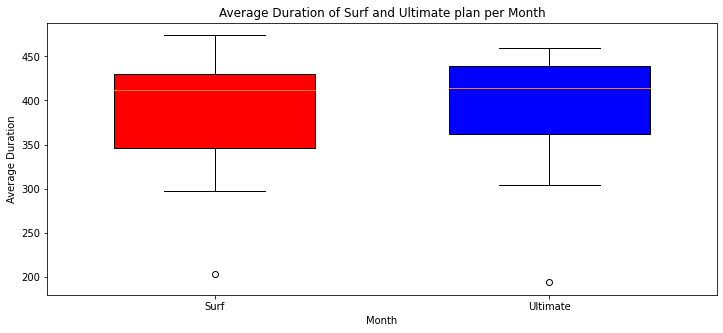

In [71]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi durasi panggilan bulanan
# dataframe calls_avg_duration berisi data yang akan digunakan dalam boxplot

plt.figure(figsize=(12, 5))
plt.title('Average Duration of Surf and Ultimate plan per Month')

# membuat boxplot untuk plan "surf" dengan warna merah
plt.boxplot(calls_avg_duration['surf'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='red'), labels=['Surf'])

# membuat boxplot untuk plan "ultimate" dengan warna biru
plt.boxplot(calls_avg_duration['ultimate'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'), labels=['Ultimate'])
plt.xlabel('Month')
plt.ylabel('Average Duration')
plt.show()

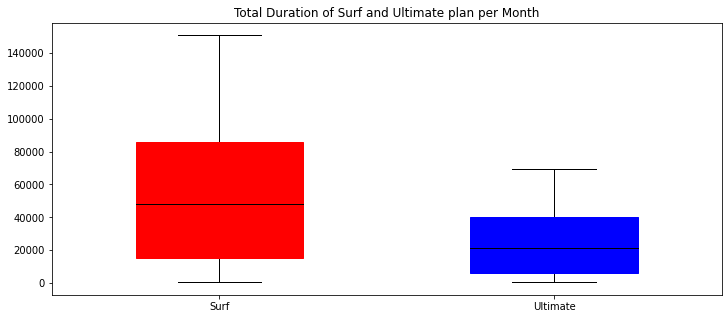

In [72]:
# dataframe calls_duration_monthly berisi data yang akan digunakan dalam boxplot
plt.figure(figsize=(12, 5))
plt.title('Total Duration of Surf and Ultimate plan per Month')

# Membuat boxplot untuk plan "surf" dengan warna merah
plt.boxplot(calls_duration_monthly['surf'], positions=[1], widths=0.5, patch_artist=True,
            boxprops=dict(facecolor='red', color='red'), medianprops=dict(color='black'))

# Membuat boxplot untuk plan "ultimate" dengan warna biru
plt.boxplot(calls_duration_monthly['ultimate'], positions=[2], widths=0.5, patch_artist=True,
            boxprops=dict(facecolor='blue', color='blue'), medianprops=dict(color='black'))

plt.xticks([1, 2], ['Surf', 'Ultimate'])
plt.show()

- <font color='green'>Kesimpulan Sementara</font>

Walaupun pada bagian average menunjukan data lebih condong ke kiri. Kita bisa pastikan bahwa di upper whisker terlihat perbedaan yang signifikan bahwa user surf lebih dominan dan lebih sering digunakan. Apakah user memang banyak yang tertarik dengan tawaran yang di dapat oleh data surf? Apakah ini hanya memandang sebuah efektifitas data?

### Pesan/SMS

- Kita di sini akan mempelajari dengan memvisualisasikan data dari panggilan. 

In [73]:
# Bandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya
messages_sum = pd.pivot_table(three_agg_dataset, index='month', columns='plan', values='sms', aggfunc='sum').reset_index()
messages_sum['month'] = messages_sum['month'].astype(str)
messages_sum

plan,month,surf,ultimate
0,2018-01,21.0,62.0
1,2018-02,108.0,151.0
2,2018-03,351.0,243.0
3,2018-04,870.0,463.0
4,2018-05,1849.0,931.0
5,2018-06,2454.0,1379.0
6,2018-07,3271.0,1937.0
7,2018-08,4662.0,2732.0
8,2018-09,5968.0,3259.0
9,2018-10,8020.0,4181.0


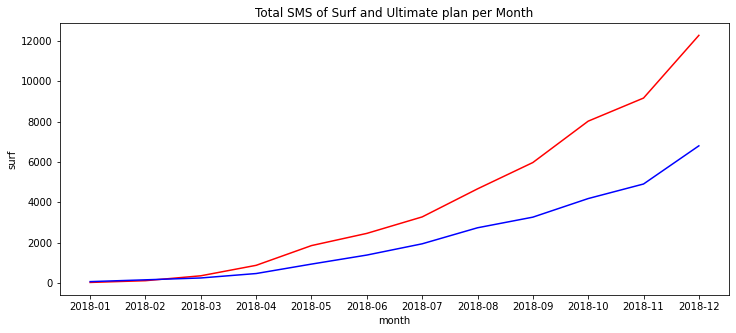

In [74]:
plt.figure(figsize=(12, 5))
plt.title('Total SMS of Surf and Ultimate plan per Month')
sns.lineplot(data=messages_sum, x="month", y="surf", color='red')
sns.lineplot(data=messages_sum, x="month", y="ultimate", color='blue')
plt.show()

- Kurva Total (Total SMS of Surf and Ultimate plan per Month): Ini menggambarkan jumlah total SMS yang dikirim oleh pengguna Surf dan Ultimate setiap bulannya. Dalam visualisasi ini, kita dapat melihat bahwa jumlah total SMS untuk paket Surf secara konsisten lebih tinggi daripada paket Ultimate. Ini berarti pengguna Surf secara keseluruhan mengirim lebih banyak SMS dibandingkan pengguna Ultimate.

In [75]:
# Bandingkan rata-rata SMS yang cenderung dikirim pengguna tiap paket per bulannya
messages_avg = pd.pivot_table(three_agg_dataset, index='month', columns='plan', values='sms', aggfunc='mean').reset_index()
messages_avg['month'] = messages_avg['month'].astype(str)
messages_avg


plan,month,surf,ultimate
0,2018-01,10.500000,15.500000
1,2018-02,12.000000,21.571429
2,2018-03,15.260870,20.250000
3,2018-04,17.400000,22.047619
4,2018-05,24.012987,32.103448
5,2018-06,25.298969,29.340426
6,2018-07,27.033058,32.830508
7,2018-08,28.777778,38.478873
8,2018-09,30.762887,37.895349
9,2018-10,33.839662,39.443396


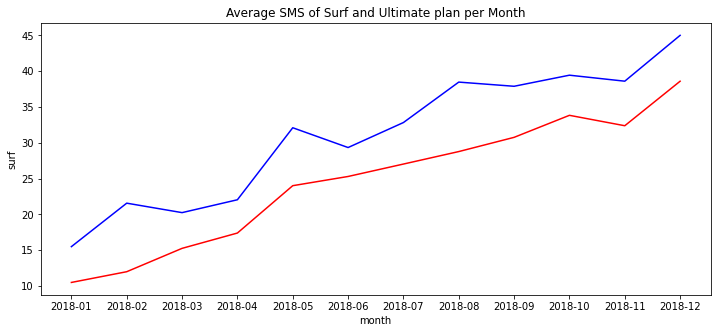

In [76]:
plt.figure(figsize=(12, 5))
plt.title('Average SMS of Surf and Ultimate plan per Month')
sns.lineplot(data=messages_avg, x="month", y="surf", color='red')
sns.lineplot(data=messages_avg, x="month", y="ultimate", color='blue')
plt.show()

- Kurva Rata-Rata (Average SMS of Surf and Ultimate plan per Month): Ini menggambarkan rata-rata jumlah SMS yang dikirim oleh pengguna Surf dan Ultimate setiap bulannya. Pada visualisasi ini, kita dapat melihat bahwa rata-rata SMS yang dikirim oleh pengguna paket Ultimate cenderung lebih tinggi daripada rata-rata SMS yang dikirim oleh pengguna paket Surf. Hal ini menunjukkan bahwa, meskipun jumlah total SMS pengguna Ultimate lebih rendah, pengguna Ultimate cenderung mengirim lebih banyak SMS per pengguna dibandingkan pengguna Surf.

- <font color='green'>Kesimpulan Sementara</font>

Penjelasan mengenai perbedaan ini bisa disebabkan oleh beberapa faktor. Salah satunya adalah bahwa pengguna Surf mungkin lebih banyak yang hanya mengirim sedikit SMS, tetapi ada banyak pengguna Surf. Sementara pengguna Ultimate mungkin cenderung mengirim lebih banyak SMS per pengguna, tetapi jumlah pengguna Ultimate lebih sedikit. Dengan kata lain, rata-rata SMS pengguna Ultimate lebih tinggi karena ada lebih sedikit pengguna Ultimate yang membagi jumlah SMS yang dikirim secara keseluruhan.







#### Varians & Boxplot Pesan/SMS

In [77]:
# mempersiapkan perhitungan data varians
# hitung rata-rata dan varians dari durasi panggilan bulanan
avg_user_messages = pd.pivot_table(three_agg_dataset, index='user_id', columns='plan', values='sms', aggfunc='mean').reset_index()

In [78]:
# dapatkan user surf
avg_surf_messages = avg_user_messages.loc[:, ['user_id', 'surf']].dropna()
avg_surf_messages.head()

plan,user_id,surf
1,1001,41.400000
2,1002,29.333333
3,1003,50.000000
4,1004,22.125000
5,1005,11.000000


In [79]:
# dapatkan user ultimate
avg_ulti_messages = avg_user_messages.loc[:, ['user_id', 'ultimate']].dropna()
avg_ulti_messages.head()

plan,user_id,ultimate
0,1000,11.0
6,1006,77.0
8,1008,28.0
11,1011,53.0
13,1013,16.0


In [80]:
# varians dan standar deviasi
# surf
surf_std_messages = round(avg_surf_messages['surf'].std(), 1)
surf_var_messages = round(avg_surf_messages['surf'].var(), 1)
print('Surf:')
print(f'Standar Deviasinya {surf_std_messages}')
print(f'Varians nya {surf_var_messages}')
print()
ulti_std_messages = round(avg_ulti_messages['ultimate'].std(), 1)
ulti_var_messages = round(avg_ulti_messages['ultimate'].var(), 1)
# ultimate
print('Ultimate:')
print(f'Standar Deviasinya {ulti_std_messages}')
print(f'Varians nya {ulti_var_messages}')

Surf:
Standar Deviasinya 31.0
Varians nya 962.1

Ultimate:
Standar Deviasinya 32.9
Varians nya 1084.2


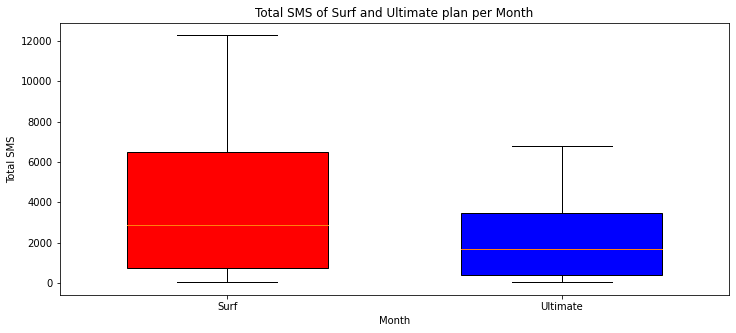

In [81]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi sms bulanan
# dataframe messages_sum berisi data yang akan digunakan dalam boxplot
plt.figure(figsize=(12, 5))
plt.title('Total SMS of Surf and Ultimate plan per Month')

# membuat boxplot untuk plan "surf" dengan warna merah
plt.boxplot(messages_sum['surf'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='red'), labels=['Surf'])

# membuat boxplot untuk plan "ultimate" dengan warna biru
plt.boxplot(messages_sum['ultimate'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'), labels=['Ultimate'])
plt.xlabel('Month')
plt.ylabel('Total SMS')
plt.show()

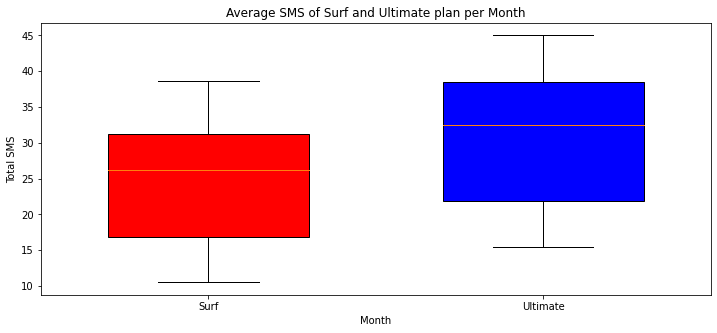

In [82]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi sms bulanan
# dataframe messages_avg berisi data yang akan digunakan dalam boxplot
plt.figure(figsize=(12, 5))
plt.title('Average SMS of Surf and Ultimate plan per Month')

# membuat boxplot untuk plan "surf" dengan warna merah
plt.boxplot(messages_avg['surf'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='red'), labels=['Surf'])

# membuat boxplot untuk plan "ultimate" dengan warna biru
plt.boxplot(messages_avg['ultimate'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'), labels=['Ultimate'])
plt.xlabel('Month')
plt.ylabel('Total SMS')
plt.show()

- Kita bisa lihat kecondongan data yang disebabkan oleh beberapa faktor yang memungkinkan bahwa rata-rata SMS pengguna Ultimate lebih tinggi karena ada lebih sedikit pengguna Ultimate yang membagi jumlah SMS yang dikirim secara keseluruhan.

### Internet

- Mari kita periksa visualisasi pada internet.

In [83]:
# Bandingkan jumlah traffic internet yang dihabiskan oleh pengguna per paket (gb_used)
internet_sum = pd.pivot_table(three_agg_dataset, index='month', columns='plan', values='gb_used', aggfunc='sum').reset_index()
internet_sum['month'] = internet_sum['month'].astype(str)
internet_sum

plan,month,surf,ultimate
0,2018-01,10.0,29.0
1,2018-02,110.0,121.0
2,2018-03,312.0,221.0
3,2018-04,611.0,343.0
4,2018-05,1087.0,489.0
5,2018-06,1502.0,725.0
6,2018-07,2042.0,973.0
7,2018-08,2735.0,1267.0
8,2018-09,3238.0,1463.0
9,2018-10,4126.0,1878.0


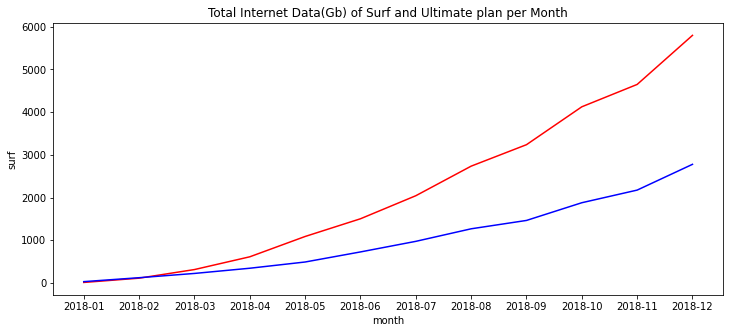

In [84]:
plt.figure(figsize=(12, 5))
plt.title('Total Internet Data(Gb) of Surf and Ultimate plan per Month')
sns.lineplot(data=internet_sum, x="month", y="surf", color='red')
sns.lineplot(data=internet_sum, x="month", y="ultimate", color='blue')
plt.show()

- Berarti sudah jelas secara kuantitas surf memiliki jumlah yang lebih banyak.

In [85]:
# Bandingkan rata-rata traffic internet yang dihabiskan oleh pengguna per paket (gb_used)
internet_avg = pd.pivot_table(three_agg_dataset, index='month', columns='plan', values='gb_used', aggfunc='mean').reset_index()
internet_avg['month'] = internet_sum['month'].astype(str)
internet_avg

plan,month,surf,ultimate
0,2018-01,5.000000,7.250000
1,2018-02,12.222222,17.285714
2,2018-03,13.565217,18.416667
3,2018-04,12.220000,16.333333
4,2018-05,14.116883,16.862069
5,2018-06,15.484536,15.425532
6,2018-07,16.876033,16.491525
7,2018-08,16.882716,17.845070
8,2018-09,16.690722,17.011628
9,2018-10,17.409283,17.716981


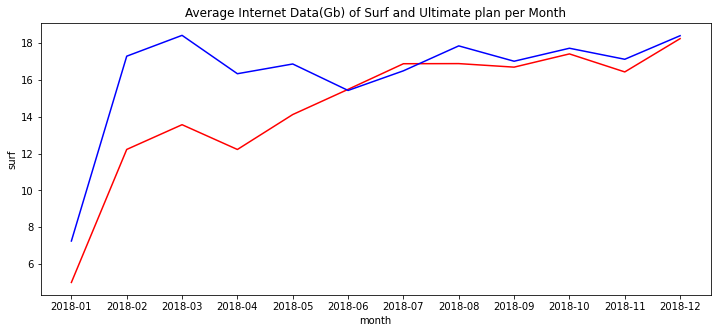

In [86]:
plt.figure(figsize=(12, 5))
plt.title('Average Internet Data(Gb) of Surf and Ultimate plan per Month')
sns.lineplot(data=internet_avg, x="month", y="surf", color='red')
sns.lineplot(data=internet_avg, x="month", y="ultimate", color='blue')
plt.show()

- Sama dengan sebelumnya, dengan sedikitnya kuantitas pengguna ultimate, paket ultimate memiliki frekuensi yang cukup besar dalam penggunaan paket data. Hal ini didapat bahwa pengguna surf memang sangat banyak namun pengguna ultimate bisa menyelaraskan garis lineplot yang dibilang cukup lebih besar kenaikannya.

#### Varians & Boxplot Internet

In [87]:
# mempersiapkan perhitungan data varians
# hitung rata-rata dan varians dari durasi panggilan bulanan
avg_user_internet = pd.pivot_table(three_agg_dataset, index='user_id', columns='plan', values='gb_used', aggfunc='mean').reset_index()


In [88]:
# dapatkan user surf
avg_surf_internet = avg_user_internet.loc[:, ['user_id', 'surf']].dropna()
avg_surf_internet.head()

plan,user_id,surf
1,1001,16.200000
2,1002,13.666667
3,1003,27.000000
4,1004,19.625000
5,1005,17.000000


In [89]:
# dapatkan user ultimate
avg_ulti_internet = avg_user_internet.loc[:, ['user_id', 'ultimate']].dropna()
avg_ulti_internet.head()

plan,user_id,ultimate
0,1000,2.000000
6,1006,17.500000
8,1008,18.666667
11,1011,18.857143
13,1013,20.000000


In [90]:
# varians dan standar deviasi
# surf
surf_std_internet = round(avg_surf_internet['surf'].std(), 1)
surf_var_internet = round(avg_surf_internet['surf'].var(), 1)
print('Surf:')
print(f'Standar Deviasinya {surf_std_internet}')
print(f'Varians nya {surf_var_internet}')
print()
ulti_std_internet = round(avg_ulti_internet['ultimate'].std(), 1)
ulti_var_internet = round(avg_ulti_internet['ultimate'].var(), 1)
# ultimate
print('Ultimate:')
print(f'Standar Deviasinya {ulti_std_internet}')
print(f'Varians nya {ulti_var_internet}')

Surf:
Standar Deviasinya 6.1
Varians nya 37.2

Ultimate:
Standar Deviasinya 5.8
Varians nya 33.4


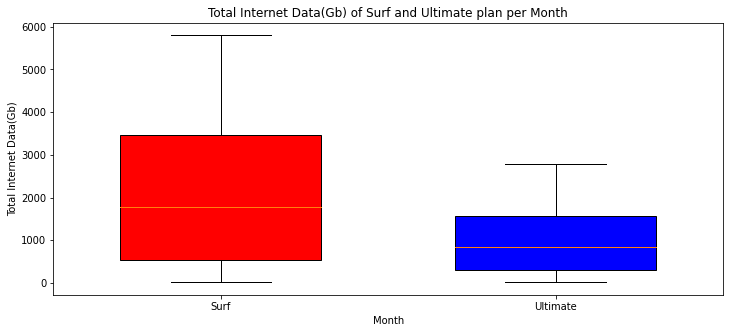

In [91]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi internet bulanan
# dataframe internet_sum berisi data yang akan digunakan dalam boxplot
plt.figure(figsize=(12, 5))
plt.title('Total Internet Data(Gb) of Surf and Ultimate plan per Month')

# membuat boxplot untuk plan "surf" dengan warna merah
plt.boxplot(internet_sum['surf'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='red'), labels=['Surf'])

# membuat boxplot untuk plan "ultimate" dengan warna biru
plt.boxplot(internet_sum['ultimate'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'), labels=['Ultimate'])
plt.xlabel('Month')
plt.ylabel('Total Internet Data(Gb)')
plt.show()

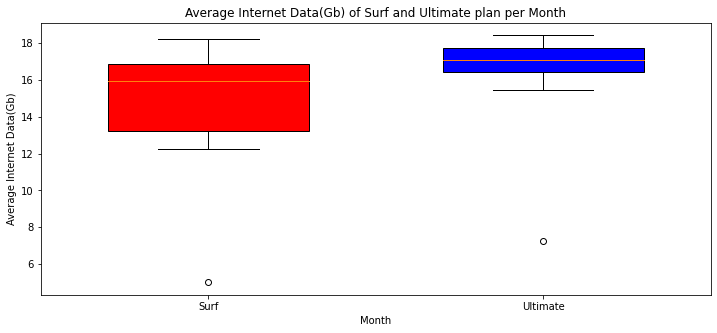

In [92]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi internet bulanan
# dataframe internet_avg berisi data yang akan digunakan dalam boxplot
plt.figure(figsize=(12, 5))
plt.title('Average Internet Data(Gb) of Surf and Ultimate plan per Month')

# membuat boxplot untuk plan "surf" dengan warna merah
plt.boxplot(internet_avg['surf'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='red'), labels=['Surf'])

# membuat boxplot untuk plan "ultimate" dengan warna biru
plt.boxplot(internet_avg['ultimate'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'), labels=['Ultimate'])
plt.xlabel('Month')
plt.ylabel('Average Internet Data(Gb)')
plt.show()

- Pola sudah terbentuk bahwa memang traffic penggunaannya memang besar walaupun dengan jumlah kuantitas lebih sedikit.

-----------

## Pendapatan

- Mari kita lihat pendapatan yang diambil dari kedua paket tersebut dan visualisasi apa yang kita dapat.

In [93]:
# Bandingkan total revenue oleh pengguna per paket (total_income)
income_sum = pd.pivot_table(three_agg_dataset, index='month', columns='plan', values='total_income', aggfunc='sum').reset_index()
income_sum['month'] = income_sum['month'].astype(str)
income_sum

plan,month,surf,ultimate
0,2018-01,40.00,280.0
1,2018-02,309.57,490.0
2,2018-03,1056.65,896.0
3,2018-04,2035.53,1533.0
4,2018-05,3667.37,2051.0
5,2018-06,4779.80,3367.0
6,2018-07,7583.56,4242.0
7,2018-08,10356.85,5173.0
8,2018-09,11304.67,6195.0
9,2018-10,15504.83,7665.0


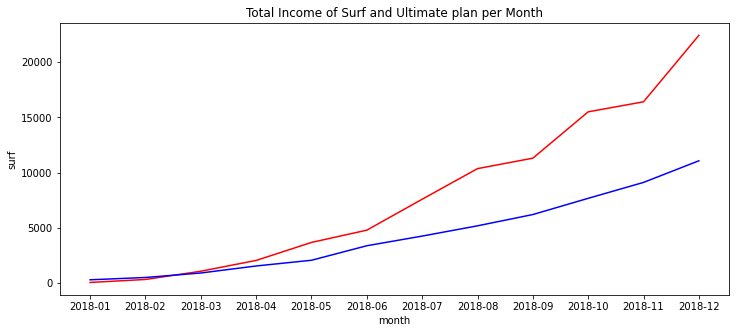

In [94]:
plt.figure(figsize=(12, 5))
plt.title('Total Income of Surf and Ultimate plan per Month')
sns.lineplot(data=income_sum, x="month", y="surf", color='red')
sns.lineplot(data=income_sum, x="month", y="ultimate", color='blue')
plt.show()

- Lineplot sudah jelas, garis merah akan lebih tinggi karena kuantitas pengguna yang tinggi untuk paket surf.

In [95]:
# Bandingkan rata-rata revenue oleh pengguna per paket (total_income)
income_avg = pd.pivot_table(three_agg_dataset, index='month', columns='plan', values='total_income', aggfunc='mean').reset_index()
income_avg['month'] = income_avg['month'].astype(str)
income_avg

plan,month,surf,ultimate
0,2018-01,20.000000,70.000000
1,2018-02,34.396667,70.000000
2,2018-03,45.941304,74.666667
3,2018-04,40.710600,73.000000
4,2018-05,47.628182,70.724138
5,2018-06,49.276289,71.638298
6,2018-07,62.674050,71.898305
7,2018-08,63.931173,72.859155
8,2018-09,58.271495,72.034884
9,2018-10,65.421224,72.311321


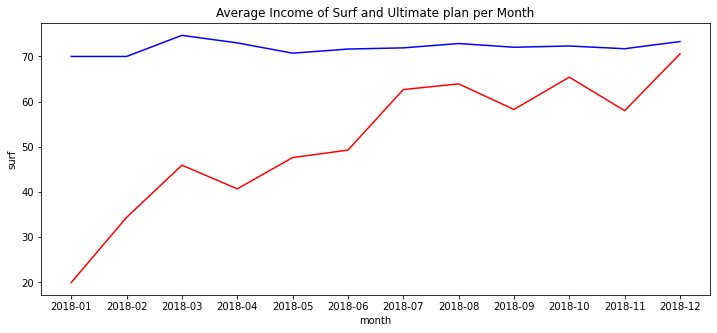

In [96]:
plt.figure(figsize=(12, 5))
plt.title('Average Income of Surf and Ultimate plan per Month')
sns.lineplot(data=income_avg, x="month", y="surf", color='red')
sns.lineplot(data=income_avg, x="month", y="ultimate", color='blue')
plt.show()

- Kali ini dalam konteks pendapatan. Tingginya ultimate merupakan faktor di mana secara kuantitas dia lebih kecil dibanding surf. Menariknya surf merupakan paket yang lebih murah namun terus berkembang secara lineplot.

In [97]:
# mempersiapkan perhitungan data varians
# hitung rata-rata dan varians dari durasi panggilan bulanan
avg_user_income = pd.pivot_table(three_agg_dataset, index='user_id', columns='plan', values='total_income', aggfunc='mean').reset_index()


In [98]:
# dapatkan user surf
avg_surf_income = avg_user_income.loc[:, ['user_id', 'surf']].dropna()
avg_surf_income.head()

plan,user_id,surf
1,1001,50.018000
2,1002,33.333333
3,1003,158.120000
4,1004,76.250000
5,1005,40.000000


In [99]:
# dapatkan user ultimate
avg_ulti_income = avg_user_income.loc[:, ['user_id', 'ultimate']].dropna()
avg_ulti_income.head()

plan,user_id,ultimate
0,1000,70.0
6,1006,77.0
8,1008,70.0
11,1011,70.0
13,1013,70.0


#### Varians & Boxplot Income (Main Goal)

In [100]:
# varians dan standar deviasi
# surf
surf_std_income = round(avg_surf_income['surf'].std(), 1)
surf_var_income = round(avg_surf_income['surf'].var(), 1)
print('Surf:')
print(f'Standar Deviasinya {surf_std_income}')
print(f'Varians nya {surf_var_income}')
print()
ulti_std_income = round(avg_ulti_income['ultimate'].std(), 1)
ulti_var_income = round(avg_ulti_income['ultimate'].var(), 1)
# ultimate
print('Ultimate:')
print(f'Standar Deviasinya {ulti_std_income}')
print(f'Varians nya {ulti_var_income}')

Surf:
Standar Deviasinya 43.6
Varians nya 1897.9

Ultimate:
Standar Deviasinya 7.4
Varians nya 55.1


- Tentu akan mendapatkan nilai varians yang lebih banyak. Hal ini dikarenakan banyaknya pengguna surf yang membayar tiap bulannya atau memang bisa kita sebut pengguna yang memilih paket surf lebih banyak dibanding ultimate. Jika saja pengguna ultimate memiliki jumlah nilai yang sama secara user, maka pasti akan sebanding dengan surf. 

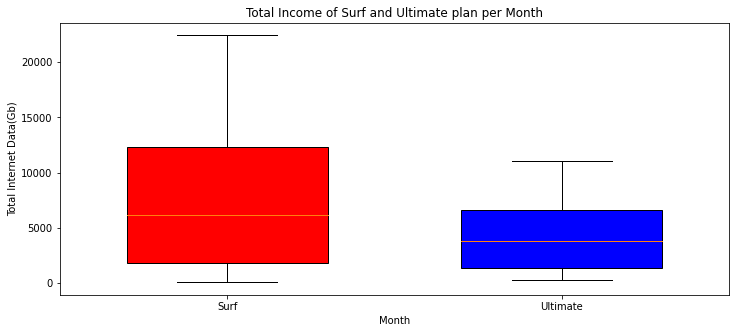

In [101]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi income bulanan
# dataframe income_sum berisi data yang akan digunakan dalam boxplot
plt.figure(figsize=(12, 5))
plt.title('Total Income of Surf and Ultimate plan per Month')

# membuat boxplot untuk plan "surf" dengan warna merah
plt.boxplot(income_sum['surf'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='red'), labels=['Surf'])

# membuat boxplot untuk plan "ultimate" dengan warna biru
plt.boxplot(income_sum['ultimate'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'), labels=['Ultimate'])
plt.xlabel('Month')
plt.ylabel('Total Internet Data(Gb)')
plt.show()

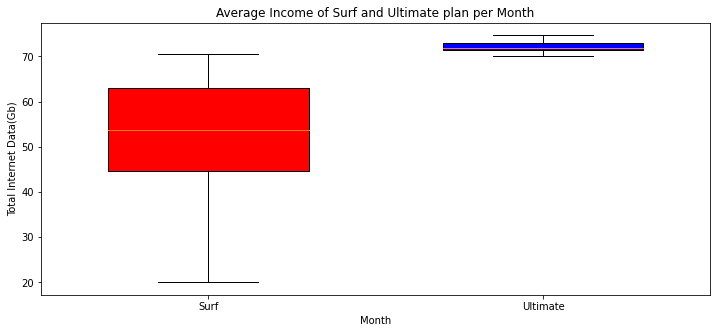

In [102]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi income bulanan
# dataframe income_avg berisi data yang akan digunakan dalam boxplot
plt.figure(figsize=(12, 5))
plt.title('Average Income of Surf and Ultimate plan per Month')

# membuat boxplot untuk plan "surf" dengan warna merah
plt.boxplot(income_avg['surf'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='red'), labels=['Surf'])

# membuat boxplot untuk plan "ultimate" dengan warna biru
plt.boxplot(income_avg['ultimate'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'), labels=['Ultimate'])
plt.xlabel('Month')
plt.ylabel('Total Internet Data(Gb)')
plt.show()

- Kita bisa mengetahui varians dari yang didapat, bahwa faktor jumlah user dapat memengaruhi output dari income. Varians yang dipunya dalam data ini memiliki angka yang sangat tinggi.

## Menguji Hipotesis Statistik

- Mari kita uji hipotesis 0 dan hipotesis 1 hanya untuk pendapatan saja.

#### Uji Hipotesis Pendapatan Murni

<font color='blue'>H0: Pendapatan rata-rata dari pengguna paket prabayar ultimate dan surf SAMA</font>

<font color='red'>H1: Pendapatan rata-rata dari pengguna paket prabayar ultimate dan surf BERBEDA</font>


<font color='brown'>Alpha: 5% = 0.05</font>

In [103]:
# Uji hipotesisnya
surf_income = three_agg_dataset.loc[three_agg_dataset['plan']=='surf', 'total_income']
surf_income

1        20.00
2        20.00
3        90.09
4        60.00
5        60.00
         ...  
2283    180.18
2288     20.78
2289     40.66
2290     20.33
2291     20.00
Name: total_income, Length: 1573, dtype: float64

In [104]:
ultimate_income = three_agg_dataset.loc[three_agg_dataset['plan']=='ultimate', 'total_income']
ultimate_income

0        70.0
19       70.0
20       84.0
26       70.0
27       70.0
        ...  
2284     70.0
2285    112.0
2286     70.0
2287     70.0
2292     70.0
Name: total_income, Length: 720, dtype: float64

In [105]:
pvalue = st.ttest_ind(ultimate_income, surf_income, nan_policy = 'omit').pvalue

In [106]:
# H0: Pendapatan rata-rata dari pengguna paket prabayar ultimate dan surf SAMA

# H1: Pendapatan rata-rata dari pengguna paket prabayar ultimate dan surf BERBEDA
alpha = 0.05

if pvalue < alpha:
    print('Menerima H1')
else:
    print('Menerima H0')

Menerima H1


In [107]:
mean_ultimate_income = ultimate_income.mean()
mean_surf_income = surf_income.mean()

In [108]:
print(mean_ultimate_income, mean_surf_income)

72.31388888888888 60.706408137317226


#### Uji Hipotesis Pendapatan Hanya di Wilayah NY-NJ

<font color='blue'>H0: H0: Pendapatan rata-rata dari pengguna paket di wilayah NY-NJ ultimate dan surf SAMA</font>

<font color='red'>H1: Pendapatan rata-rata dari pengguna paket di wilayah NY-NJ ultimate dan surf BERBEDA</font>


<font color='brown'>Alpha: 5% = 0.05</font>

In [109]:
# Uji hipotesisnya
surf_ny_nj_income = three_agg_dataset.loc[(three_agg_dataset['plan'] == 'surf') & (three_agg_dataset['city'].str.contains('NY-NJ')), 'total_income']
surf_ny_nj_income

56       20.00
57       38.84
75       20.00
76      100.00
77       20.00
         ...  
2259     80.00
2260    120.42
2261    170.27
2262    200.00
2263    110.33
Name: total_income, Length: 312, dtype: float64

In [110]:
ultimate_ny_nj_income = three_agg_dataset.loc[(three_agg_dataset['plan'] == 'ultimate') & (three_agg_dataset['city'].str.contains('NY-NJ')), 'total_income']
ultimate_ny_nj_income

112     70.0
113     70.0
114     70.0
115     70.0
116     70.0
        ... 
1874    70.0
2021    70.0
2176    70.0
2177    70.0
2292    70.0
Name: total_income, Length: 65, dtype: float64

In [111]:
p_value = st.ttest_ind(ultimate_ny_nj_income, surf_ny_nj_income, nan_policy = 'omit').pvalue

In [112]:
# H0: Pendapatan rata-rata dari pengguna paket di wilayah NY-NJ ultimate dan surf SAMA

# H1: Pendapatan rata-rata dari pengguna paket di wilayah NY-NJ ultimate dan surf BERBEDA

alpha = 0.05

if p_value < alpha:
    print('Menerima H1')
else:
    print('Menerima H0')
    

Menerima H1


In [113]:
mean_ultimate_ny_nj_income = ultimate_ny_nj_income.mean()
mean_surf_ny_nj_income = surf_ny_nj_income.mean()

In [114]:
print(mean_ultimate_ny_nj_income, mean_surf_ny_nj_income)

74.95384615384616 56.789583333333326


- <font color='green'>Kesimpulan Sementara</font>

Kita bisa pastikan bahwa dari semua uji hipotesis yang dilakukan. Paket ultimate memiliki pendapatan yang cukup besar karena harga yang ditetapkan dan tawaran yang ditetapkan memengaruhi pendapatan tersebut. Menariknya, perbedaan antara surf dan ultimate tidaklah jauh sangat berbeda. Angka surf hampir mendekati ultimate. Bisa dipastikan bahwa paket surf didukung oleh faktor banyaknya pengguna dalam proses bisnis ini. 

----------------------

## Kesimpulan Umum

**Pendapatan Rata-rata:**

- Pendapatan rata-rata dari pengguna paket prabayar "Ultimate" (sekitar 72.31 USD) lebih tinggi daripada pendapatan rata-rata dari pengguna paket prabayar "Surf" (sekitar 60.71 USD) selama tahun 2018. Sedangkan untuk per wilayah (NY-NJ), paket prabayar "Ultimate" (sekitar 74.95 USD) lebih tinggi daripada pendapatan rata-rata dari pengguna paket prabayar "Surf" (sekitar 56.78 USD)

**Perilaku Pelanggan:**
- Pengguna paket "Surf" cenderung mengirim lebih banyak SMS dibandingkan pengguna paket "Ultimate," meskipun jumlah total SMS yang dikirim oleh pengguna "Surf" lebih rendah.
- Pengguna paket "Ultimate" cenderung menghabiskan lebih banyak waktu untuk panggilan telepon, yang mungkin merupakan salah satu faktor yang menyebabkan pendapatan mereka lebih tinggi.




**Insights:**

**Fokus pada Paket "Ultimate":**
- Dengan mempertimbangkan pendapatan rata-rata yang lebih tinggi dari pengguna paket "Ultimate," perusahaan Megaline sebaiknya mempertimbangkan untuk lebih fokus dalam memasarkan paket ini kepada pelanggan.

**Strategi Pemasaran:**
- Perusahaan dapat mengoptimalkan strategi pemasaran dengan menyoroti keunggulan dan manfaat dari paket "Ultimate" yang lebih menarik bagi pelanggan.

**Segmentasi Pelanggan:**
- Analisis lebih lanjut dapat dilakukan untuk memahami faktor-faktor yang mempengaruhi preferensi pelanggan, seperti wilayah geografis atau kelompok usia tertentu. Hal ini dapat membantu dalam mengidentifikasi segmen pelanggan yang paling berpotensi untuk mengadopsi paket "Ultimate."

**Penawaran Khusus:**
- Perusahaan dapat mempertimbangkan penawaran khusus atau insentif bagi pelanggan yang ingin beralih ke paket "Ultimate" untuk mendorong konversi.

**Evaluasi Tarif:**
- Perusahaan dapat mengevaluasi struktur tarif untuk memastikan bahwa paket "Ultimate" memberikan nilai tambah yang signifikan bagi pelanggan dalam bentuk lebih banyak panggilan, pesan, atau data untuk uang yang mereka bayarkan.